### Install Dependencies and Setup

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backpo

textdistance                  4.2.1
threadpoolctl                 2.2.0
three-merge                   0.1.1
tifffile                      2021.7.2
tinycss                       0.4
tldextract                    3.2.0
toml                          0.10.2
tomli                         1.2.2
toolz                         0.11.2
torch                         1.13.1
torchvision                   0.14.1
tornado                       6.1
tqdm                          4.64.0
traitlets                     5.1.1
trio                          0.21.0
trio-websocket                0.9.2
Twisted                       22.2.0
twisted-iocpsupport           1.0.2
typed-ast                     1.4.3
typing_extensions             4.1.1
ujson                         5.1.0
Unidecode                     1.2.0
urllib3                       1.26.9
vaderSentiment                3.3.2
w3lib                         1.21.0
watchdog                      2.1.6
wcwidth                       0.2.5
webencodings        

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable

  error: subprocess-exited-with-error


  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'



  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\hp\AppData\Local\Temp\pip-install-6b4at3gh\tensorflow-gpu_1e65ea715e024114a73be5ca32e7e1a3\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not run successfully.
  exit code: 1
  
  [

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

### Remove doggy images 

In [6]:
import cv2
import imghdr

In [13]:
data_dir = r"C:\Users\hp\Desktop\Capstone\model\Food_Detector_App\assets\Indian Food Images" 

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### Loading the data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\hp\Desktop\Capstone\model\Food_Detector_App\assets\Indian Food Images")

Found 4000 files belonging to 83 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

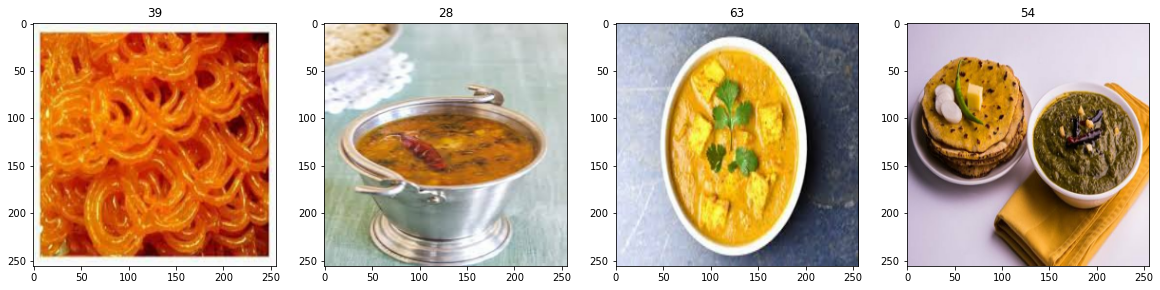

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scale data

In [22]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [23]:
data.as_numpy_iterator().next()

(array([[[[0.8862745 , 0.84313726, 0.81960785],
          [0.8862745 , 0.84313726, 0.81960785],
          [0.88646597, 0.8433287 , 0.8197993 ],
          ...,
          [0.56059283, 0.47039676, 0.40765166],
          [0.564591  , 0.47439492, 0.41164982],
          [0.56858915, 0.47839308, 0.41564798]],
 
         [[0.8862745 , 0.84313726, 0.81960785],
          [0.8862745 , 0.84313726, 0.81960785],
          [0.8863452 , 0.8432079 , 0.8196785 ],
          ...,
          [0.56059283, 0.47039676, 0.40765166],
          [0.564591  , 0.47439492, 0.41164982],
          [0.5661394 , 0.4759433 , 0.4131982 ]],
 
         [[0.8847656 , 0.8416284 , 0.81809896],
          [0.88480985, 0.8416726 , 0.8181432 ],
          [0.8862745 , 0.84313726, 0.81960785],
          ...,
          [0.55757505, 0.46737897, 0.40463388],
          [0.5615732 , 0.47137713, 0.40863204],
          [0.5631823 , 0.4729862 , 0.4102411 ]],
 
         ...,
 
         [[0.8021353 , 0.661006  , 0.558998  ],
          [0.71462

### Split data

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train_size

87

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Building a deep learning model 

In [27]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
87/87 [==============================] - 69s 764ms/step - loss: -264701664.0000 - accuracy: 0.0115 - val_loss: -2103222784.0000 - val_accuracy: 0.0162
Epoch 2/20
87/87 [==============================] - 63s 718ms/step - loss: -52697661440.0000 - accuracy: 0.0093 - val_loss: -211500105728.0000 - val_accuracy: 0.0162
Epoch 3/20
87/87 [==============================] - 62s 710ms/step - loss: -1014609543168.0000 - accuracy: 0.0104 - val_loss: -2612056817664.0000 - val_accuracy: 0.0175
Epoch 4/20
87/87 [==============================] - 62s 704ms/step - loss: -7119844671488.0000 - accuracy: 0.0111 - val_loss: -14361661800448.0000 - val_accuracy: 0.0150
Epoch 5/20
87/87 [==============================] - 62s 708ms/step - loss: -29769775185920.0000 - accuracy: 0.0104 - val_loss: -53154968240128.0000 - val_accuracy: 0.0175
Epoch 6/20
87/87 [==============================] - 61s 698ms/step - loss: -89864884191232.0000 - accuracy: 0.0104 - val_loss: -139335961673728.0000 - val_accurac

### Plot performance 

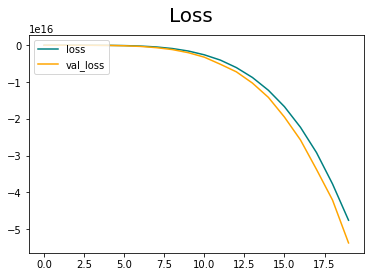

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

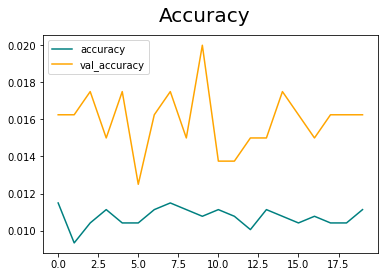

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 119ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9817708, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.018229166, shape=(), dtype=float32)


### Test

In [42]:
import cv2

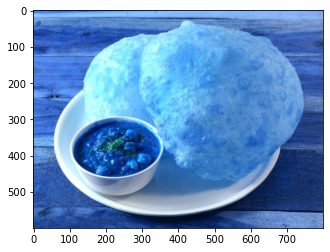

In [43]:
img = cv2.imread(r"C:\Users\hp\Desktop\Capstone\model\Food_Detector_App\assets\Indian Food Images\test\bhatura.jpg")
plt.imshow(img)
plt.show()

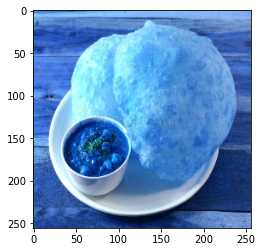

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 116ms/step


In [46]:
yhat

array([[1.]], dtype=float32)